<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebook/Keras_01_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris
### sepal: 萼片,   petal: 花瓣

##### data from: https://www.kaggle.com/uciml/iris/data
##### code modified from: https://www.kaggle.com/pratik2901/sequential-ann-and-visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras import optimizers

In [2]:
seed = 3
np.random.seed(seed)

In [3]:
iris = pd.read_csv("Iris.csv")

In [4]:
iris.head()  # .head gives the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
col = iris.columns       # .columns gives columns names in data 
print(col)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


# **Visualization**

In [6]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

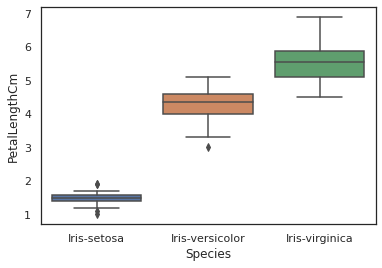

In [7]:
sns.set(style='white', color_codes=True)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

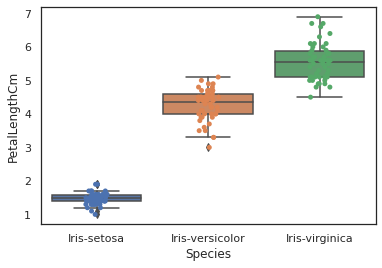

In [8]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812f809ad0>,
      dtype=object)

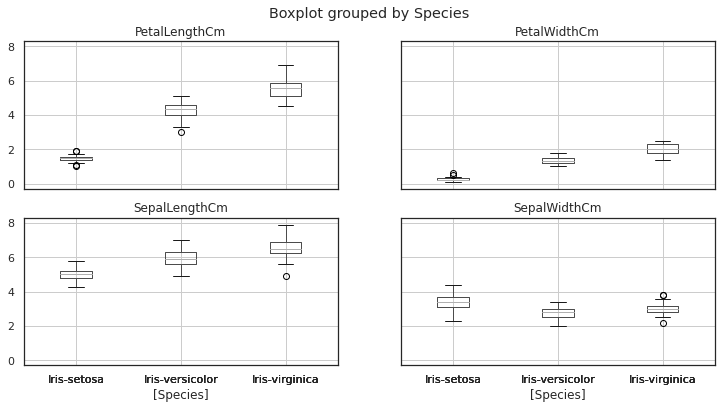

In [9]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

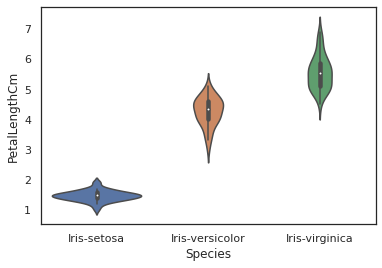

In [10]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


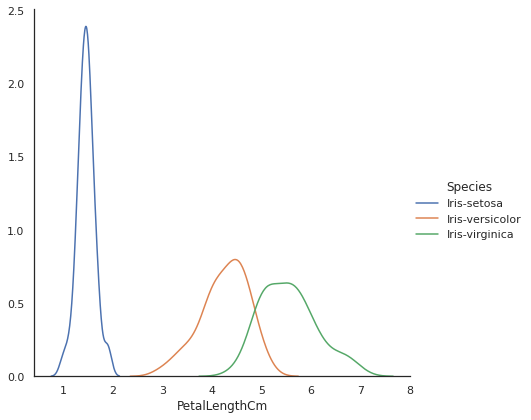

In [11]:
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


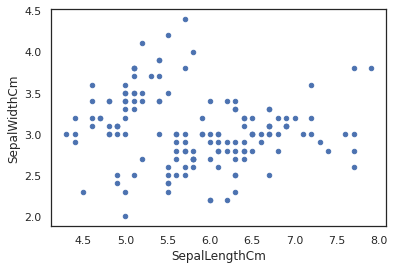

In [12]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


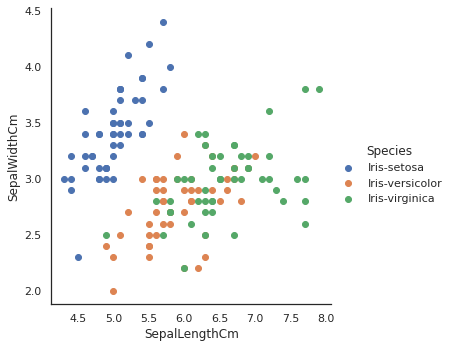

In [13]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


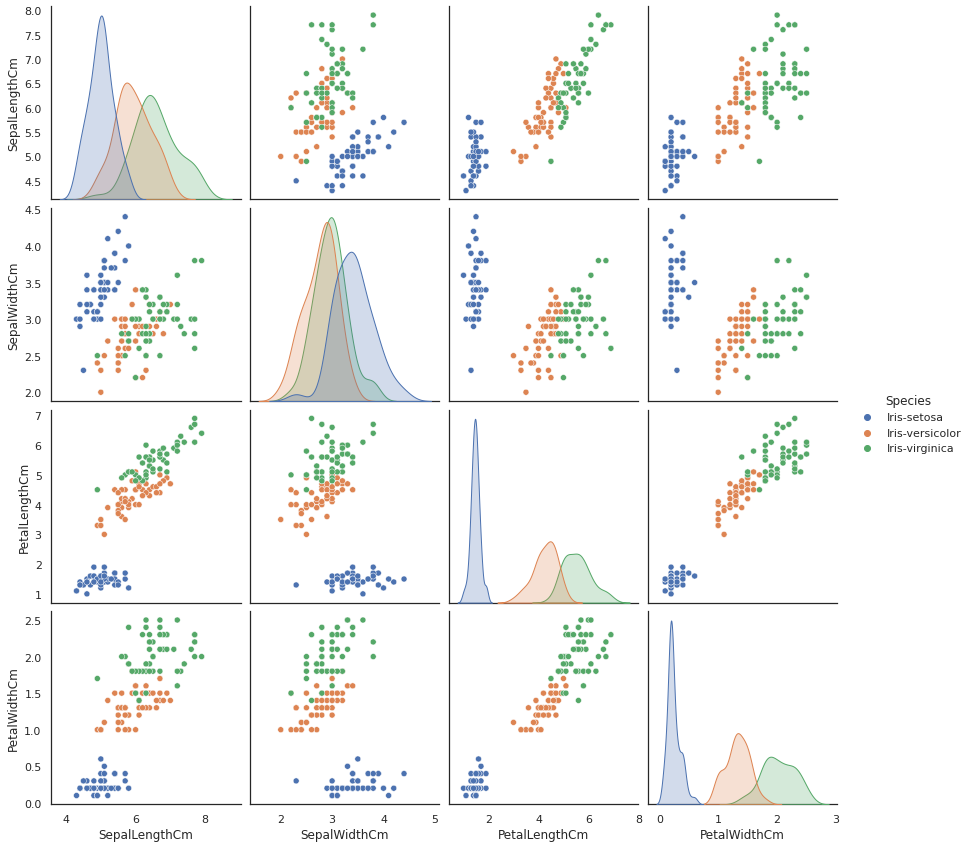

In [14]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

# **Label Encoding**

In [15]:
dataset = iris.values
X = dataset[:,1:5].astype(float)
print(X[0:5,:])
#print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [16]:
# convert text into vectors
# method #1
Y = dataset[:,5]
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [17]:
Y_df = pd.DataFrame(Y)
# print(Y_df)

In [18]:
Y_onehot = pd.get_dummies(Y_df)
# print(Y_onehot)

In [19]:
# convert text into vectors
# method #2
Y = dataset[:,5]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
print(Y[0:5])
print(encoded_Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
answer_Y = np_utils.to_categorical(encoded_Y)
print(answer_Y[0:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# **Sequential Based ANN **

In [23]:
def baseline_model():
    #test = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [24]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X,answer_Y,epochs=90,batch_size=5)

Epoch 1/90
30/30 [==============================] - 1s 919us/step - loss: 1.5944 - accuracy: 0.3333
Epoch 2/90
30/30 [==============================] - 0s 923us/step - loss: 1.3731 - accuracy: 0.3267
Epoch 3/90
30/30 [==============================] - 0s 1ms/step - loss: 1.2908 - accuracy: 0.2467
Epoch 4/90
30/30 [==============================] - 0s 972us/step - loss: 1.2453 - accuracy: 0.2867
Epoch 5/90
30/30 [==============================] - 0s 944us/step - loss: 1.2079 - accuracy: 0.2800
Epoch 6/90
30/30 [==============================] - 0s 1ms/step - loss: 1.1754 - accuracy: 0.2933
Epoch 7/90
30/30 [==============================] - 0s 1ms/step - loss: 1.1384 - accuracy: 0.3133
Epoch 8/90
30/30 [==============================] - 0s 1ms/step - loss: 1.1097 - accuracy: 0.3000
Epoch 9/90
30/30 [==============================] - 0s 1ms/step - loss: 1.0919 - accuracy: 0.3333
Epoch 10/90
30/30 [==============================] - 0s 1ms/step - loss: 1.0741 - accuracy: 0.3333
Epoch 11/90

In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


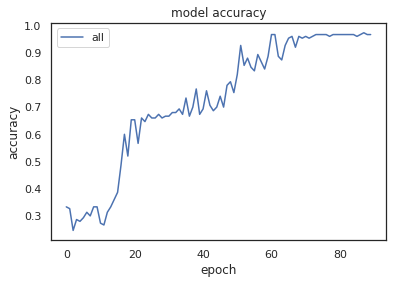

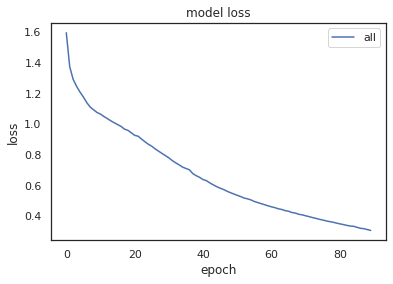

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['all'], loc='upper left')
plt.savefig('acc.png')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['all'], loc='upper right')
plt.savefig('loss.png')
plt.show()

In [30]:
scores = model.evaluate(X,answer_Y)

5/5 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.9733


In [31]:
print("Accuracy:%.2f%%"%(scores[1]*100))

Accuracy:97.33%
